(8123, 119)
Mean Absolute Error: 0.00019571639586410635
Mean Squared Error: 3.858936484490399e-05
Root Mean Squared Error: 0.006212033873451109
Train Score: 0.999908282520325 MSE (0.999954140208602 RMSE)
test Score: 0.999845601779105 MSE (0.999922797909471 RMSE)


c:\Users\katha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\katha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


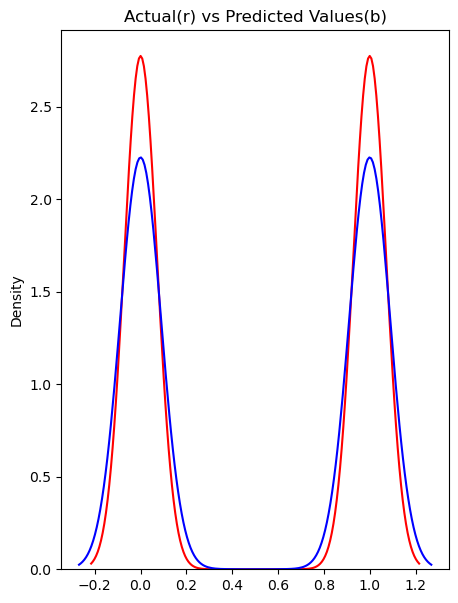

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pydot
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#-----------------------------------------import and encoding of data so it can be used in randomForest Model-------------------------------------
#dataset import
colnames=['e/p','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=colnames, header=0)

#oneHOtEncoding
labels = colnames
categorical_data = dataset[labels]
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(categorical_data).toarray()
ohe_labels = ohe.get_feature_names_out(labels)
features = pd.DataFrame(feature_arr,columns=ohe_labels)
print(features.shape)

#-------------------------------------------------implementation of random forest AI model------------------------------------------------
#preparing datasets
x= features.iloc[:, -117:].values
Y=features.iloc[:, :-117].values

x_train,x_test, Y_train,Y_test = train_test_split(x, Y, test_size=1/3)


#creating random forest regressor object
param_grid= {
    'n_estimators': np.array(range(70,120)),
    'max_features': ['auto', 'sqrt', 'log2']
}
regressor = RandomForestRegressor(random_state = 42)# scores are better with 100 estimators
# we use grid_search to find the best parameters for regressor
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=10, scoring='f1_macro', n_jobs=4)
#print(regressor.get_params())#-->best n_estimators is 100

regressor.fit(x_train, Y_train)
y_pred = regressor.predict(x_test)


#---------------------------------test and values of errors of model---------------------------------------------------------------------------------
#we do not use mape because it is problematic for datasets whose scales do not have a meaningful 0 or for intermittent demand datasets, where y_t=0 occurs frequently.
#instead we use MASE: mean  absolut error
#accuracy is usually not measured in regression so we only compute error values

df=pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':y_pred.flatten()})
#print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

#errors = abs(y_pred - Y_test)
#print('Mean Absolute Error: ', np.mean(errors), 'degrees.')


trainScore = regressor.score(x_train, Y_train)
print('Train Score: %.15f MSE (%.15f RMSE)' % (trainScore, np.sqrt(trainScore)))

testScore = regressor.score(x_test, Y_test)
print('test Score: %.15f MSE (%.15f RMSE)' % (testScore, np.sqrt(testScore)))


#confusion matrix: ------------------------- TODO-----------------------


# ---------------------------------------------------graph to display performance-------------------------------------------------------------
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual(r) vs Predicted Values(b)')


plt.show()
plt.close()
